In [19]:
import os
import random
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import shutil

# Load Dataset

In [20]:
from google.colab import drive
drive.mount('/content/drive')

# Install pv for progress visualization
!apt-get -qq install pv

DATASET_PATH = "/content/drive/MyDrive/Samsung_Project/jianjin008/icip"
REF_PATH = os.path.join(DATASET_PATH, "ref_img")
DIST_PATH = os.path.join(DATASET_PATH, "jnd_img")
MOS_FILE = os.path.join(DATASET_PATH, "mos.txt")
PATCHES_PATH = "/content/drive/MyDrive/Samsung_Project/jianjin008_patches"

print(f"DATASET_PATH defined as: {DATASET_PATH}")

!du -sh /content/jianjin008

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DATASET_PATH defined as: /content/drive/MyDrive/Samsung_Project/jianjin008/icip
du: cannot access '/content/jianjin008': No such file or directory


# Sanity on datasets and patches

In [21]:
# Sanity check on dataset and patches

# Check if the dataset directory exists and contains files
if os.path.exists(DATASET_PATH) and os.listdir(DATASET_PATH):
    print(f"Dataset directory '{DATASET_PATH}' exists and contains files.")
else:
    print(f"Error: Dataset directory '{DATASET_PATH}' not found or empty.")

# Check if reference and distorted image directories exist and contain files
if os.path.exists(REF_PATH) and os.listdir(REF_PATH):
    print(f"Reference images directory '{REF_PATH}' exists and contains files.")
else:
    print(f"Error: Reference images directory '{REF_PATH}' not found or empty.")

if os.path.exists(DIST_PATH) and os.listdir(DIST_PATH):
    print(f"Distorted images directory '{DIST_PATH}' exists and contains files.")
else:
    print(f"Error: Distorted images directory '{DIST_PATH}' not found or empty.")

# Check if MOS file exists
if os.path.exists(MOS_FILE):
    print(f"MOS file '{MOS_FILE}' found.")
else:
    print(f"Error: MOS file '{MOS_FILE}' not found.")

# Check if patches directory exists (it will be created later, so this is just a check)
if os.path.exists(PATCHES_PATH):
    print(f"Patches directory '{PATCHES_PATH}' exists.")
else:
    print(f"Patches directory '{PATCHES_PATH}' does not exist")

# Optional: Display a few image file names to confirm data is there
if os.path.exists(REF_PATH) and os.listdir(REF_PATH):
    print("\nSample reference image files:")
    print(random.sample(os.listdir(REF_PATH), min(5, len(os.listdir(REF_PATH)))))

if os.path.exists(DIST_PATH) and os.listdir(DIST_PATH):
    print("\nSample distorted image files:")
    print(random.sample(os.listdir(DIST_PATH), min(5, len(os.listdir(DIST_PATH)))))

# Display a few image file names from tid2013_patches/copy
COPY_PATCHES_PATH = os.path.join(PATCHES_PATH, "copy")
if os.path.exists(COPY_PATCHES_PATH) and os.listdir(COPY_PATCHES_PATH):
    print(f"\nSample patch files from {COPY_PATCHES_PATH}:")
    print(random.sample(os.listdir(COPY_PATCHES_PATH), min(5, len(os.listdir(COPY_PATCHES_PATH)))))
elif os.path.exists(COPY_PATCHES_PATH):
     print(f"\nDirectory '{COPY_PATCHES_PATH}' is empty.")
else:
    print(f"\nDirectory '{COPY_PATCHES_PATH}' does not exist.")

# Optional: Read a few lines of the MOS file
if os.path.exists(MOS_FILE):
    print("\nSample lines from MOS file:")
    with open(MOS_FILE, 'r') as f:
        for i, line in enumerate(f):
            print(line.strip())
            if i >= 4: # Print first 5 lines
                break

Dataset directory '/content/drive/MyDrive/Samsung_Project/jianjin008/icip' exists and contains files.
Reference images directory '/content/drive/MyDrive/Samsung_Project/jianjin008/icip/ref_img' exists and contains files.
Distorted images directory '/content/drive/MyDrive/Samsung_Project/jianjin008/icip/jnd_img' exists and contains files.
MOS file '/content/drive/MyDrive/Samsung_Project/jianjin008/icip/mos.txt' found.
Patches directory '/content/drive/MyDrive/Samsung_Project/jianjin008_patches' exists.

Sample reference image files:
['I52.png', 'I07.png', 'I04.png', 'I92.bmp', 'I89.bmp']

Sample distorted image files:
['I102_14_02.bmp', 'I27_13_01.png', 'I26_19_01.png', 'I101_19_03.bmp', 'I19_18_02.png']

Sample patch files from /content/drive/MyDrive/Samsung_Project/jianjin008_patches/copy:
['copy_patch_1122.png', 'copy_patch_0760.png', 'copy_patch_0300.png', 'copy_patch_0546.png', 'copy_patch_0336.png']

Sample lines from MOS file:
I12_01_01.png 0.87
I17_01_01.png 0.875
I17_01_02.png 

In [22]:
# Print amount of files in jianjin008
if os.path.exists(DATASET_PATH):
    print(f"Amount of files in {DATASET_PATH}: {len(os.listdir(DATASET_PATH))}")
else:
    print(f"Directory '{DATASET_PATH}' does not exist.")


# Print amount of files in jianjin008/reference_images
if os.path.exists(REF_PATH):
    print(f"Amount of files in {REF_PATH}: {len(os.listdir(REF_PATH))}")
else:
    print(f"Directory '{REF_PATH}' does not exist.")

# Print amount of files in jianjin008/distorted_images
if os.path.exists(DIST_PATH):
    print(f"Amount of files in {DIST_PATH}: {len(os.listdir(DIST_PATH))}")
else:
    print(f"Directory '{DIST_PATH}' does not exist.")

# Print amount of files in jianjin008_patches/copy
COPY_PATCHES_PATH = os.path.join(PATCHES_PATH, "copy")
if os.path.exists(COPY_PATCHES_PATH):
    print(f"Amount of files in {COPY_PATCHES_PATH}: {len(os.listdir(COPY_PATCHES_PATH))}")
else:
    print(f"Directory '{COPY_PATCHES_PATH}' does not exist.")

# Print amount of lines in mos.txt
MOS_TXT_FILE = os.path.join(DATASET_PATH, "mos.txt")
if os.path.exists(MOS_TXT_FILE):
    with open(MOS_TXT_FILE, 'r') as f:
        line_count = sum(1 for line in f)
    print(f"Amount of lines in {MOS_TXT_FILE}: {line_count}")
else:
    print(f"File '{MOS_TXT_FILE}' does not exist.")

# Display psnr.png if it exists
PSNR_PNG_FILE = os.path.join(PATCHES_PATH, "psnr_histogram.png")
if os.path.exists(PSNR_PNG_FILE):
    try:
        img = Image.open(PSNR_PNG_FILE)
        plt.imshow(img)
        plt.axis('off') # Hide axes
        plt.show()
    except Exception as e:
        print(f"Error displaying image: {e}")

Amount of files in /content/drive/MyDrive/Samsung_Project/jianjin008/icip: 7
Amount of files in /content/drive/MyDrive/Samsung_Project/jianjin008/icip/ref_img: 106
Amount of files in /content/drive/MyDrive/Samsung_Project/jianjin008/icip/jnd_img: 1642
Amount of files in /content/drive/MyDrive/Samsung_Project/jianjin008_patches/copy: 1930
Amount of lines in /content/drive/MyDrive/Samsung_Project/jianjin008/icip/mos.txt: 1642


Found 1109 unique image and distortion type combinations.


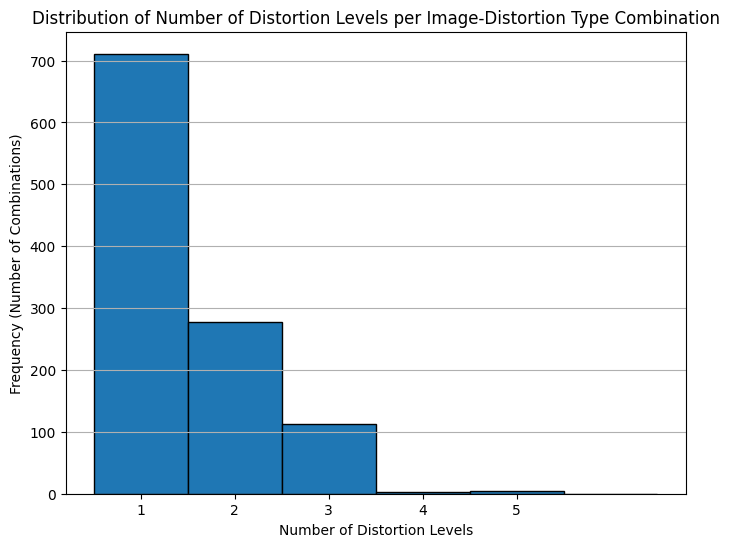


Distribution of combinations by number of distortion levels:
  711 combinations have 1 distortion level(s).
  277 combinations have 2 distortion level(s).
  113 combinations have 3 distortion level(s).
  3 combinations have 4 distortion level(s).
  5 combinations have 5 distortion level(s).


In [23]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt
from collections import Counter

# Define the path to the dataset and mos.txt file
DATASET_PATH = "/content/drive/MyDrive/Samsung_Project/jianjin008/icip"
MOS_FILE = os.path.join(DATASET_PATH, "mos.txt")

# Dictionary to store distortion levels per image and distortion type
distortion_levels_per_image_type = defaultdict(lambda: defaultdict(set))

if os.path.exists(MOS_FILE):
    try:
        with open(MOS_FILE, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) > 0:
                    filename = parts[0]
                    # Extract image number, distortion type, and level from the filename
                    # Filename format: IXX_YY_Z.png or IXX_YY_Z.bmp
                    filename_parts = filename.split('_')
                    if len(filename_parts) >= 3:
                        image_number = filename_parts[0] # e.g., I17
                        distortion_type = filename_parts[1] # e.g., 05
                        distortion_level = filename_parts[2].split('.')[0] # e.g., 01, 02, 03
                        distortion_levels_per_image_type[image_number][distortion_type].add(distortion_level)
                    else:
                        print(f"Skipping line with unexpected filename format: {line.strip()}")

        if distortion_levels_per_image_type:
            # Count the number of distortion levels for each image-distortion type combination
            num_levels_counts = []
            for image_number in distortion_levels_per_image_type.keys():
                for distortion_type in distortion_levels_per_image_type[image_number].keys():
                    num_levels = len(distortion_levels_per_image_type[image_number][distortion_type])
                    num_levels_counts.append(num_levels)

            if num_levels_counts:
                print(f"Found {len(num_levels_counts)} unique image and distortion type combinations.")

                # Create a histogram of the number of distortion levels
                plt.figure(figsize=(8, 6))
                # Use bins from 0.5 to max_levels + 0.5 to center bars on integer values
                max_levels = max(num_levels_counts)
                bins = [i + 0.5 for i in range(max_levels + 2)]
                plt.hist(num_levels_counts, bins=bins, edgecolor='black')
                plt.xlabel("Number of Distortion Levels")
                plt.ylabel("Frequency (Number of Combinations)")
                plt.title("Distribution of Number of Distortion Levels per Image-Distortion Type Combination")
                plt.xticks(range(1, max_levels + 1)) # Set x-ticks to integer distortion levels
                plt.grid(axis='y')
                plt.show()

                # Optional: Print counts for each number of levels
                level_distribution = Counter(num_levels_counts)
                print("\nDistribution of combinations by number of distortion levels:")
                for num_levels, count in sorted(level_distribution.items()):
                    print(f"  {count} combinations have {num_levels} distortion level(s).")

            else:
                print("No unique image and distortion type combinations found.")

        else:
            print(f"No valid filenames found in {MOS_FILE} to extract distortion information.")

    except Exception as e:
        print(f"An error occurred while processing {MOS_FILE}: {e}")

else:
    print(f"File '{MOS_FILE}' not found.")

In [24]:
import os
from collections import defaultdict
from google.colab import drive
import matplotlib.pyplot as plt
from collections import Counter

# Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Define the path to the dataset and mos.txt file
DATASET_PATH = "/content/drive/MyDrive/Samsung_Project/jianjin008/icip"
MOS_FILE = os.path.join(DATASET_PATH, "mos.txt")

# Dictionary to store distortion levels per image and distortion type
distortion_levels_per_image_type = defaultdict(lambda: defaultdict(set))
filtered_distortion_levels = []
filtered_distortion_types = []

num = 0

if os.path.exists(MOS_FILE):
    try:
        with open(MOS_FILE, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) > 0:
                    filename = parts[0]
                    # Extract image number, distortion type, and level from the filename
                    # Filename format: IXX_YY_Z.png or IXX_YY_Z.bmp
                    filename_parts = filename.split('_')
                    if len(filename_parts) >= 3:
                        image_number = filename_parts[0] # e.g., I17
                        distortion_type = filename_parts[1] # e.g., 05
                        distortion_level = filename_parts[2].split('.')[0] # e.g., 01, 02, 03
                        distortion_levels_per_image_type[image_number][distortion_type].add(distortion_level)
                    else:
                        print(f"Skipping line with unexpected filename format: {line.strip()}")

        if distortion_levels_per_image_type:
            print("Image and distortion type combinations with 3 or more distortion levels:")
            # Sort by image number and then distortion type for consistent output
            sorted_images = sorted(distortion_levels_per_image_type.keys())
            for image_number in sorted_images:
                sorted_distortion_types = sorted(distortion_levels_per_image_type[image_number].keys())
                for distortion_type in sorted_distortion_types:
                    levels = sorted(list(distortion_levels_per_image_type[image_number][distortion_type])) # Sort levels numerically
                    # Filter to only include those with 3 or more distortion levels
                    if len(levels) >= 3:
                        print(f"  {image_number}_{distortion_type}: {len(levels)} distortion level(s) - {', '.join(levels)}")
                        filtered_distortion_levels.extend(levels)
                        filtered_distortion_types.extend([distortion_type] * len(levels))
                        num = num + 1

            print(f"\nTotal number of unique image and distortion type combinations with 3+ levels: {num}")

        else:
            print(f"No valid filenames found in {MOS_FILE} to extract distortion information.")

    except Exception as e:
        print(f"An error occurred while processing {MOS_FILE}: {e}")

else:
    print(f"File '{MOS_FILE}' not found.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image and distortion type combinations with 3 or more distortion levels:
  I04_19: 3 distortion level(s) - 01, 02, 03
  I07_16: 3 distortion level(s) - 01, 02, 03
  I08_16: 3 distortion level(s) - 01, 02, 03
  I100_03: 3 distortion level(s) - 01, 02, 03
  I101_02: 3 distortion level(s) - 01, 02, 03
  I101_05: 3 distortion level(s) - 01, 02, 03
  I101_19: 3 distortion level(s) - 01, 02, 03
  I101_25: 3 distortion level(s) - 01, 02, 03
  I102_03: 3 distortion level(s) - 01, 02, 03
  I102_05: 3 distortion level(s) - 01, 02, 03
  I102_19: 3 distortion level(s) - 01, 02, 03
  I104_02: 3 distortion level(s) - 01, 02, 03
  I104_05: 3 distortion level(s) - 01, 02, 03
  I104_14: 3 distortion level(s) - 01, 02, 03
  I104_19: 3 distortion level(s) - 01, 02, 03
  I106_03: 5 distortion level(s) - 01, 02, 03, 04, 05
  I106_16: 3 distortion level(s) - 01, 02, 03
  I106_23: 

# Perform some EDA: show samples of an image and its distorted images

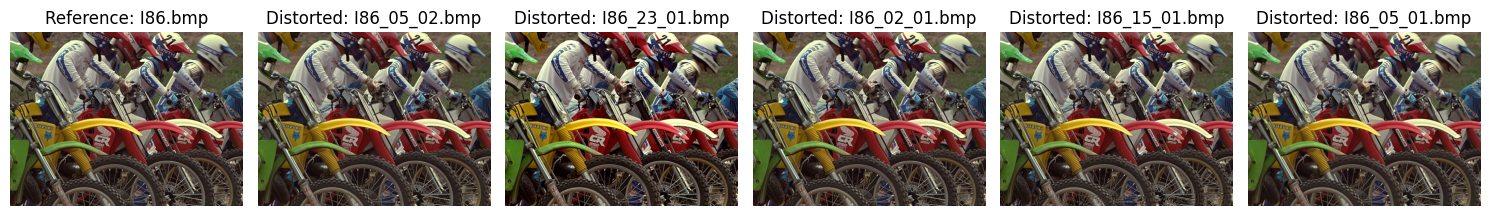

In [25]:
# Choose a random reference image
reference_images = [f for f in os.listdir(REF_PATH) if f.endswith('.bmp')]
if not reference_images:
    print("No reference images found.")
else:
    random_ref_image_name = random.choice(reference_images)
    random_ref_image_path = os.path.join(REF_PATH, random_ref_image_name)

    try:
        ref_img = Image.open(random_ref_image_path)
        # Adjust figure size for better spacing
        plt.figure(figsize=(15, 7))
        plt.subplot(1, 6, 1) # Allocate space for reference + up to 5 distorted
        plt.imshow(ref_img)
        plt.title(f"Reference: {random_ref_image_name}")
        plt.axis('off')

        # Find corresponding distorted images
        # Distorted images are named like iXX_YY_Z.bmp where XX is the reference image number
        ref_number = random_ref_image_name.replace('I', '').replace('.bmp', '')
        corresponding_distorted_images = [f for f in os.listdir(DIST_PATH) if f.lower().startswith(f'i{int(ref_number):02d}_')]

        if not corresponding_distorted_images:
            print(f"No distorted images found for reference image {random_ref_image_name}")
            plt.show() # Show the reference image even if no distorted ones are found
        else:
            # Display up to 5 distorted images
            for i, dist_image_name in enumerate(random.sample(corresponding_distorted_images, min(5, len(corresponding_distorted_images)))):
                dist_image_path = os.path.join(DIST_PATH, dist_image_name)
                plt.subplot(1, min(5, len(corresponding_distorted_images)) + 1, i + 2)
                dist_img = Image.open(dist_image_path)
                plt.imshow(dist_img)
                plt.title(f"Distorted: {dist_image_name}")
                plt.axis('off')
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"Error displaying images: {e}")

# Perform EDA on patches: show samples from the single "copy" subfolder

Displaying sample patches from '/content/drive/MyDrive/Samsung_Project/jianjin008_patches/copy':


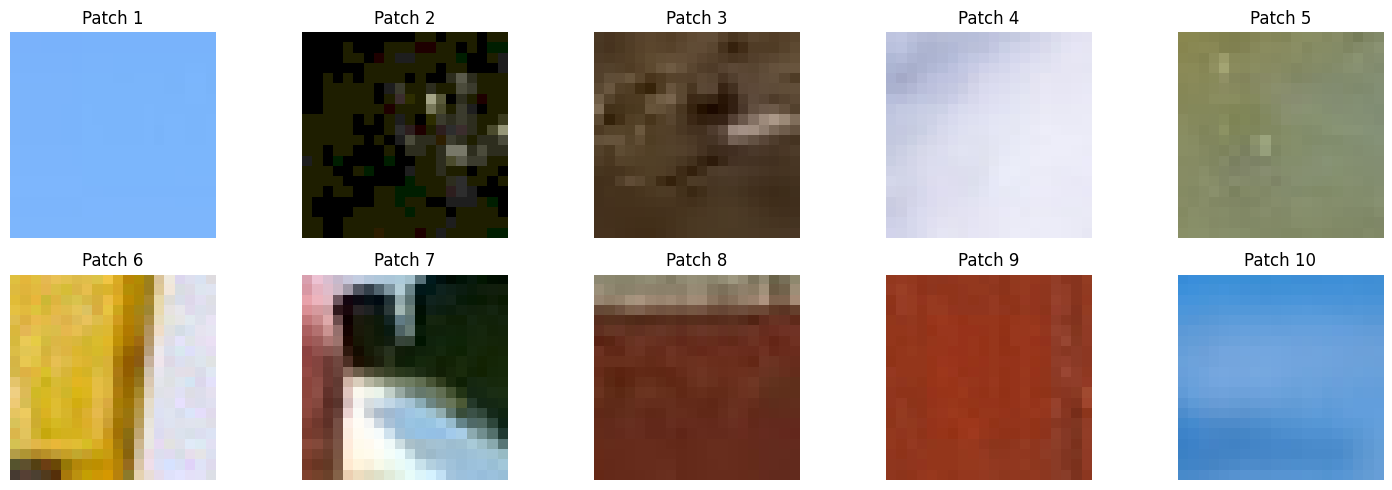

In [26]:
# Define the path for the "copy" patch subfolder
COPY_PATCHES_PATH = os.path.join(PATCHES_PATH, "copy")

# Get a list of patch files in the "copy" directory
copy_patch_files = [f for f in os.listdir(COPY_PATCHES_PATH) if f.endswith('.png')] # Assuming patches are saved as .png

# Ensure there are patches to display
if not copy_patch_files:
    print(f"Error: Could not find patch files in '{COPY_PATCHES_PATH}'.")
else:
    print(f"Displaying sample patches from '{COPY_PATCHES_PATH}':")
    # Choose a few random patch file names
    sample_copy_patch_files = random.sample(copy_patch_files, min(10, len(copy_patch_files))) # Display up to 10 samples

    plt.figure(figsize=(15, 5))

    for i, patch_file_name in enumerate(sample_copy_patch_files):
        patch_path = os.path.join(COPY_PATCHES_PATH, patch_file_name)

        try:
            # Load and display the patch
            patch_img = Image.open(patch_path)
            plt.subplot(2, 5, i + 1) # Display in a 2x5 grid
            plt.imshow(patch_img)
            plt.title(f"Patch {i+1}")
            plt.axis('off')

        except Exception as e:
            print(f"Error displaying patch {patch_file_name}: {e}")

    plt.tight_layout()
    plt.show()


Total patch pairs checked for overlap within images: 17949
Number of overlapping patch pairs: 1069
Percentage of overlapping patch pairs: 5.96%

Distribution of overlapping area percentages:
  0% overlap: 0 pairs
  1-10% overlap: 40 pairs
  10-50% overlap: 48 pairs
  50-100% overlap: 16 pairs
  100% overlap: 965 pairs


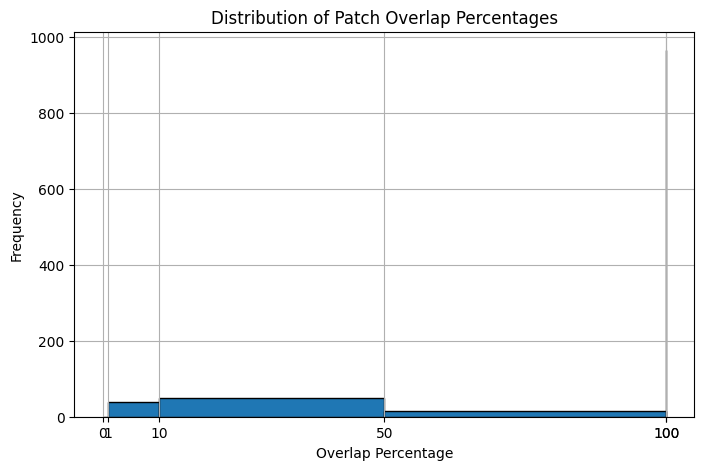

In [27]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Function to calculate the intersection area of two patch regions
def intersection_area(region1, region2):
    # Assuming region is a list or tuple with [x, y, width, height]
    x1, y1, w1, h1 = region1
    x2, y2, w2, h2 = region2

    x_overlap = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    y_overlap = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))

    return x_overlap * y_overlap

# Function to check for overlap between two patch regions
def regions_overlap(region1, region2):
    return intersection_area(region1, region2) > 0

# --- Analyze Overlap using 'roi' metadata (grouped by clean_image) ---

metadata_file = os.path.join(PATCHES_PATH, "metadata.json")
if os.path.exists(metadata_file):
    try:
        with open(metadata_file, 'r') as f:
            metadata = json.load(f)

        if metadata:
            total_patch_pairs_checked = 0
            overlapping_patch_pairs_count = 0
            overlap_areas = []
            patch_area = None # To store the area of a single patch

            # Group patches by clean_image
            patches_by_image = defaultdict(list)
            for entry in metadata:
                if 'clean_image' in entry and 'metadata' in entry and 'roi' in entry['metadata']:
                     roi_data = entry['metadata']['roi']
                     if isinstance(roi_data, list) and len(roi_data) == 4:
                        patches_by_image[entry['clean_image']].append({
                            'id': entry.get('unique_sample_id', entry.get('clean_image', 'N/A')),
                            'region': roi_data
                        })
                        if patch_area is None: # Get patch area from the first valid entry
                            patch_area = roi_data[2] * roi_data[3]


            if patches_by_image:
                for clean_image, patch_list in patches_by_image.items():
                    if len(patch_list) > 1: # Only check for overlap if there's more than one patch from the same image
                        for i in range(len(patch_list)):
                            for j in range(i + 1, len(patch_list)):
                                total_patch_pairs_checked += 1
                                overlap_area = intersection_area(patch_list[i]['region'], patch_list[j]['region'])
                                if overlap_area > 0:
                                    overlapping_patch_pairs_count += 1
                                    overlap_areas.append(overlap_area)
                                    # Optional: Print details of overlapping pairs if needed for debugging
                                    # print(f"  Overlap detected between patch {patch_list[i]['id']} and patch {patch_list[j]['id']} (Area: {overlap_area})")


                # Calculate and print percentage of overlapping patches
                if total_patch_pairs_checked > 0:
                    percentage_overlapping = (overlapping_patch_pairs_count / total_patch_pairs_checked) * 100
                    print(f"\nTotal patch pairs checked for overlap within images: {total_patch_pairs_checked}")
                    print(f"Number of overlapping patch pairs: {overlapping_patch_pairs_count}")
                    print(f"Percentage of overlapping patch pairs: {percentage_overlapping:.2f}%")
                else:
                    print("\nNo patch pairs to check for overlap within images.")

                # Show distribution of overlapping areas
                if overlapping_patch_pairs_count > 0 and patch_area is not None:
                    print("\nDistribution of overlapping area percentages:")
                    overlap_percentages = [(area / patch_area) * 100 for area in overlap_areas]

                    # Define bins for distribution
                    # Adjusted bins to align with desired categories and include 100%
                    bins = [0, 1, 10, 50, 99.999, 100]
                    labels = ['0%', '1-10%', '10-50%', '50-100%', '100%']


                    # Categorize overlaps
                    categorized_overlaps = {}
                    for percentage in overlap_percentages:
                        categorized = False
                        for k in range(len(bins) - 1):
                            if bins[k] <= percentage < bins[k+1]:
                                label = labels[k]
                                if label not in categorized_overlaps:
                                    categorized_overlaps[label] = 0
                                categorized_overlaps[label] += 1
                                categorized = True
                                break
                        # Handle exactly 100% overlap separately
                        if not categorized and percentage == 100:
                             label = '100%'
                             if label not in categorized_overlaps:
                                    categorized_overlaps[label] = 0
                             categorized_overlaps[label] += 1


                    # Print distribution (ensure all labels are printed even if count is 0)
                    for label in labels:
                         print(f"  {label} overlap: {categorized_overlaps.get(label, 0)} pairs")


                    # Optional: Plot histogram of overlap percentages
                    plt.figure(figsize=(8, 5))
                    # Use the same bins for consistency with categorization
                    plt.hist(overlap_percentages, bins=bins, edgecolor='black')
                    plt.xlabel("Overlap Percentage")
                    plt.ylabel("Frequency")
                    plt.title("Distribution of Patch Overlap Percentages")
                    plt.xticks(bins) # Set x-ticks to the bin edges
                    plt.grid(True)
                    plt.show()


                elif overlapping_patch_pairs_count > 0 and patch_area is None:
                     print("\nCould not calculate overlap percentage as patch area is unknown.")


            else:
                print("No valid patch information (clean_image, metadata.roi) found in metadata entries to analyze overlap.")

        else:
            print("Metadata file is empty.")

    except json.JSONDecodeError:
        print(f"Error decoding JSON from {metadata_file}. Please check the file for syntax errors.")
    except Exception as e:
        print(f"An error occurred while analyzing overlap: {e}")

else:
    print(f"Metadata file '{metadata_file}' not found. Cannot analyze overlap.")

Found 1930 'color' values.


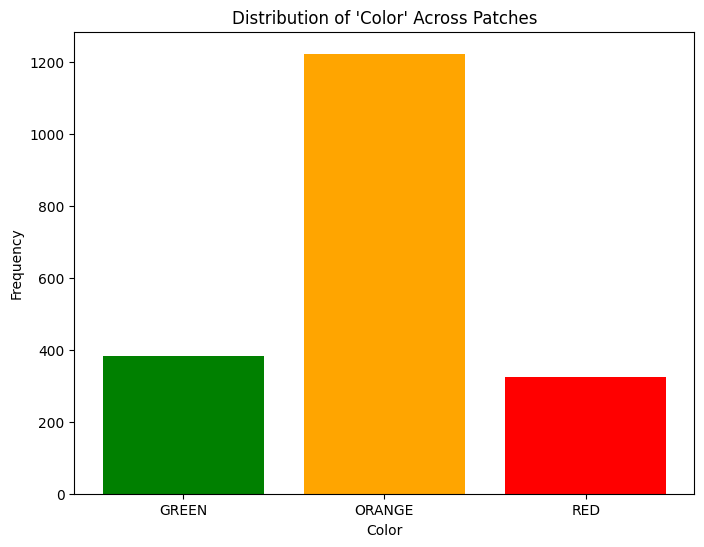


Color distribution counts:
  ORANGE: 1224
  GREEN: 382
  RED: 324


In [39]:
import os
import json
import matplotlib.pyplot as plt
from collections import Counter

# Define the path to the metadata file
metadata_file = os.path.join(PATCHES_PATH, "metadata.json")

color_values = []

if os.path.exists(metadata_file):
    try:
        with open(metadata_file, 'r') as f:
            metadata = json.load(f)

        if metadata:
            for entry in metadata:
                # Access 'color' nested within 'metadata'
                if 'metadata' in entry and 'color' in entry['metadata']:
                    color = entry['metadata']['color']
                    color_values.append(color)
                # Add other potential key locations/names if necessary


            if color_values:
                print(f"Found {len(color_values)} 'color' values.")
                # Count the occurrences of each color
                color_counts = Counter(color_values)

                # Sort colors alphabetically for consistent plotting
                sorted_colors = sorted(color_counts.keys())
                counts = [color_counts[color] for color in sorted_colors]

                # Define a mapping from color names to actual colors for plotting
                color_map = {
                    'RED': 'red',
                    'ORANGE': 'orange',
                    'GREEN': 'green'
                    # Add other colors if they exist in your data
                }

                # Get the actual colors for the sorted color names, defaulting to gray if not in map
                bar_colors = [color_map.get(color.upper(), 'gray') for color in sorted_colors]


                # Create a bar chart (histogram for categorical data)
                plt.figure(figsize=(8, 6))
                plt.bar(sorted_colors, counts, color=bar_colors) # Use the defined colors
                plt.xlabel("Color")
                plt.ylabel("Frequency")
                plt.title("Distribution of 'Color' Across Patches")
                plt.show()

                print("\nColor distribution counts:")
                for color, count in color_counts.most_common():
                    print(f"  {color}: {count}")

            else:
                print("No 'color' values found in the metadata with the assumed key name ('metadata' -> 'color').")

        else:
            print("Metadata file is empty.")

    except json.JSONDecodeError:
        print(f"Error decoding JSON from {metadata_file}. Please check the file for syntax errors.")
    except Exception as e:
        print(f"An error occurred while plotting the color distribution: {e}")

else:
    print(f"Metadata file '{metadata_file}' not found.")


Found 1930 unique patches with 100% overlap.

Distribution of Methods for 100% Overlapping Patches:
  copy: 965
  blend: 965

Distribution of Colors for 100% Overlapping Patches:
  ORANGE: 1224
  GREEN: 382
  RED: 324

Basic Statistics for MOS Scores (Original) of 100% Overlapping Patches:
  Count: 1930
  Mean: 0.4871
  Median: 0.5167
  Standard Deviation: 0.2047
  Min: 0.0016
  Max: 0.9941


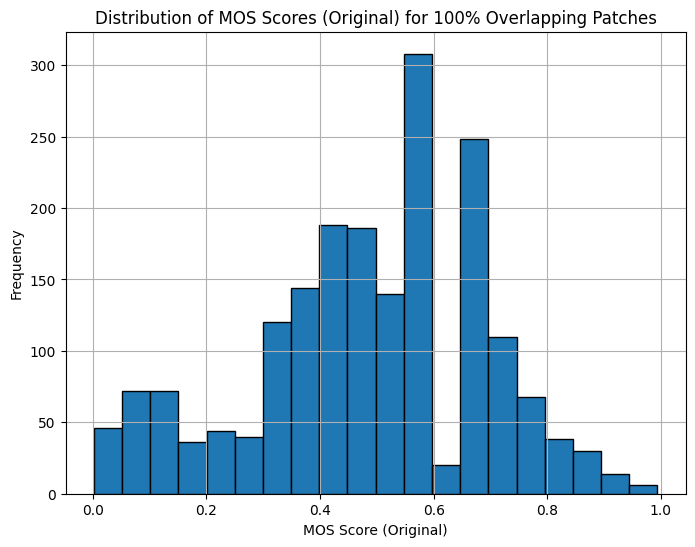

In [29]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import numpy as np

# Function to calculate the intersection area of two patch regions
def intersection_area(region1, region2):
    x1, y1, w1, h1 = region1
    x2, y2, w2, h2 = region2

    x_overlap = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    y_overlap = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))

    return x_overlap * y_overlap

# Define the path to the metadata file
metadata_file = os.path.join(PATCHES_PATH, "metadata.json")

fully_overlapping_patches_info = []

if os.path.exists(metadata_file):
    try:
        with open(metadata_file, 'r') as f:
            metadata = json.load(f)

        if metadata:
            # Group patches by clean_image
            patches_by_image = defaultdict(list)
            for entry in metadata:
                if 'clean_image' in entry and 'metadata' in entry and 'roi' in entry['metadata']:
                     roi_data = entry['metadata']['roi']
                     if isinstance(roi_data, list) and len(roi_data) == 4:
                        patches_by_image[entry['clean_image']].append({
                            'id': entry.get('unique_sample_id', entry.get('clean_image', 'N/A')),
                            'region': roi_data,
                            'method': entry['metadata'].get('method', 'unknown'), # Get method
                            'color': entry['metadata'].get('color', 'unknown'), # Get color
                            'mos_original': entry['metadata'].get('mos_original', None), # Get original MOS
                            'score': entry.get('score', None) # Get score
                        })

            # Identify fully overlapping patch pairs and store their info
            processed_pairs = set() # To avoid processing the same pair twice
            for clean_image, patch_list in patches_by_image.items():
                if len(patch_list) > 1:
                    for i in range(len(patch_list)):
                        for j in range(i + 1, len(patch_list)):
                            patch1 = patch_list[i]
                            patch2 = patch_list[j]

                            # Create a unique key for the pair to avoid duplicates (order doesn't matter)
                            pair_key = tuple(sorted((patch1['id'], patch2['id'])))
                            if pair_key in processed_pairs:
                                continue
                            processed_pairs.add(pair_key)

                            overlap_area = intersection_area(patch1['region'], patch2['region'])
                            patch1_area = patch1['region'][2] * patch1['region'][3] # width * height
                            patch2_area = patch2['region'][2] * patch2['region'][3]

                            # Check for 100% overlap (considering floating point inaccuracies)
                            # Check if overlap area is approximately equal to both patch areas
                            if patch1_area > 0 and patch2_area > 0 and abs(overlap_area - patch1_area) < 1e-6 and abs(overlap_area - patch2_area) < 1e-6:
                                # Add information for both patches in the fully overlapping pair
                                fully_overlapping_patches_info.append(patch1)
                                fully_overlapping_patches_info.append(patch2)


            # Remove duplicate patch entries (a patch can be part of multiple 100% overlapping pairs)
            # Use a set of patch IDs to keep track of unique patches
            unique_fully_overlapping_patches = {}
            for patch_info in fully_overlapping_patches_info:
                 unique_fully_overlapping_patches[patch_info['id']] = patch_info

            fully_overlapping_patches_list = list(unique_fully_overlapping_patches.values())

            print(f"\nFound {len(fully_overlapping_patches_list)} unique patches with 100% overlap.")

            if fully_overlapping_patches_list:
                # --- Calculate and Display Statistics for 100% Overlapping Patches ---

                # Distribution of Methods
                methods = [p['method'] for p in fully_overlapping_patches_list if p['method'] != 'unknown']
                method_counts = Counter(methods)
                print("\nDistribution of Methods for 100% Overlapping Patches:")
                for method, count in method_counts.most_common():
                    print(f"  {method}: {count}")

                # Distribution of Colors
                colors = [p['color'] for p in fully_overlapping_patches_list if p['color'] != 'unknown']
                color_counts = Counter(colors)
                print("\nDistribution of Colors for 100% Overlapping Patches:")
                for color, count in color_counts.most_common():
                    print(f"  {color}: {count}")

                # Distribution of MOS Scores (Original)
                mos_scores = [p['mos_original'] for p in fully_overlapping_patches_list if p['mos_original'] is not None]
                if mos_scores:
                    mos_scores_np = np.array(mos_scores)
                    print("\nBasic Statistics for MOS Scores (Original) of 100% Overlapping Patches:")
                    print(f"  Count: {len(mos_scores)}")
                    print(f"  Mean: {np.mean(mos_scores_np):.4f}")
                    print(f"  Median: {np.median(mos_scores_np):.4f}")
                    print(f"  Standard Deviation: {np.std(mos_scores_np):.4f}")
                    print(f"  Min: {np.min(mos_scores_np):.4f}")
                    print(f"  Max: {np.max(mos_scores_np):.4f}")

                    # Plot histogram of MOS scores
                    plt.figure(figsize=(8, 6))
                    plt.hist(mos_scores_np, bins=20, edgecolor='black')
                    plt.xlabel("MOS Score (Original)")
                    plt.ylabel("Frequency")
                    plt.title("Distribution of MOS Scores (Original) for 100% Overlapping Patches")
                    plt.grid(True)
                    plt.show()

                else:
                    print("\nNo valid MOS scores found for 100% overlapping patches.")


            else:
                print("No unique patches found with 100% overlap based on the metadata.")

        else:
            print("Metadata file is empty.")

    except json.JSONDecodeError:
        print(f"Error decoding JSON from {metadata_file}. Please check the file for syntax errors.")
    except Exception as e:
        print(f"An error occurred while analyzing 100% overlapping patches: {e}")

else:
    print(f"Metadata file '{metadata_file}' not found.")

### Display 5 copy patches and corresponding 5 blend patches


Found 965 matching 'copy' and 'blend' patch pairs.


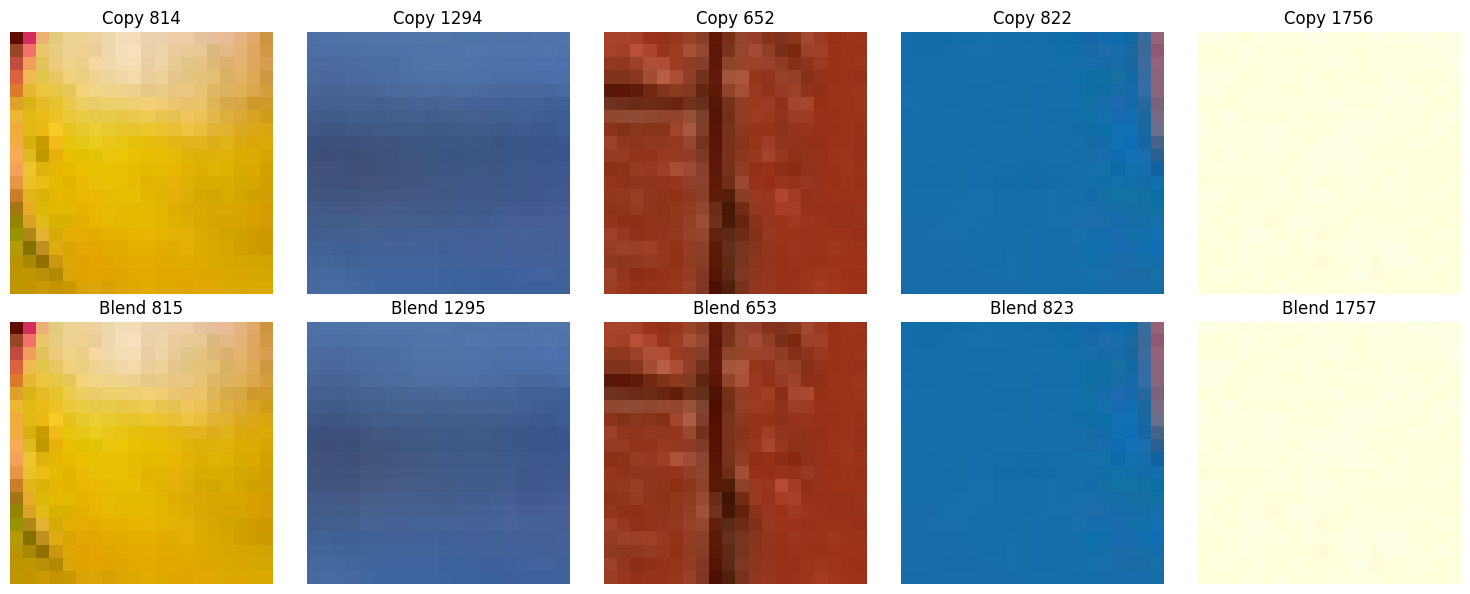

In [38]:
# Define the path for the patch subfolders
COPY_PATCHES_PATH = os.path.join(PATCHES_PATH, "copy")

# Get lists of patch files from the single directory
all_patch_files = [f for f in os.listdir(COPY_PATCHES_PATH) if f.endswith('.png')]

# Separate copy and blend files based on filename
copy_patch_files = [f for f in all_patch_files if f.startswith('copy_patch_')]
blend_patch_files = [f for f in all_patch_files if f.startswith('blend_patch_')]

# Filter for files that exist in both 'copy' and 'blend' and have a numerical part after 'patch_'
matching_patch_numbers = []
for copy_file in copy_patch_files:
    if copy_file.startswith('copy_patch_'):
        try:
            # Extract the numerical part from the copy file
            copy_patch_number = int(copy_file.replace('copy_patch_', '').replace('.png', ''))
            # Calculate the expected numerical part for the corresponding blend file
            blend_patch_number = copy_patch_number + 1
            corresponding_blend_file = f'blend_patch_{blend_patch_number:04d}.png' # Use 4 digits for formatting

            if corresponding_blend_file in blend_patch_files:
                matching_patch_numbers.append(copy_patch_number) # Store the copy patch number for pairing
        except ValueError:
            # Skip files that don't have a valid number after 'copy_patch_'
            continue

if not matching_patch_numbers:
    print("No matching 'copy' and 'blend' patch pairs found.")
else:
    print(f"Found {len(matching_patch_numbers)} matching 'copy' and 'blend' patch pairs.")

    # Choose a few random matching patch numbers
    sample_patch_numbers = random.sample(matching_patch_numbers, min(5, len(matching_patch_numbers))) # Display up to 5 pairs

    # Adjust figure size and subplot layout for horizontal display
    num_samples = len(sample_patch_numbers)
    plt.figure(figsize=(num_samples * 3, 6)) # Adjust figure size for horizontal layout

    for i, patch_number in enumerate(sample_patch_numbers):
        copy_file_name = f'copy_patch_{patch_number:04d}.png' # Use 4 digits for formatting
        blend_file_name = f'blend_patch_{patch_number + 1:04d}.png' # Use 4 digits for formatting and add 1 for blend

        # Both files are in the same directory now
        copy_path = os.path.join(COPY_PATCHES_PATH, copy_file_name)
        blend_path = os.path.join(COPY_PATCHES_PATH, blend_file_name) # Use the same path for blend

        try:
            # Load and display the copy patch (Top row)
            copy_img = Image.open(copy_path)
            plt.subplot(2, num_samples, i + 1) # Row 1, Column i+1
            plt.imshow(copy_img)
            plt.title(f"Copy {patch_number}")
            plt.axis('off')

            # Load and display the blend patch (Bottom row)
            blend_img = Image.open(blend_path)
            plt.subplot(2, num_samples, i + num_samples + 1) # Row 2, Column i+1
            plt.imshow(blend_img)
            plt.title(f"Blend {patch_number + 1}")
            plt.axis('off')

        except FileNotFoundError:
             print(f"Error: Patch file not found for pair {patch_number} (copy: {copy_file_name}, blend: {blend_file_name})")
        except Exception as e:
            print(f"Error displaying patch pair {patch_number}: {e}")

    plt.tight_layout()
    plt.show()

Found 1642 MOS values in /content/drive/MyDrive/Samsung_Project/jianjin008/icip/mos.txt.


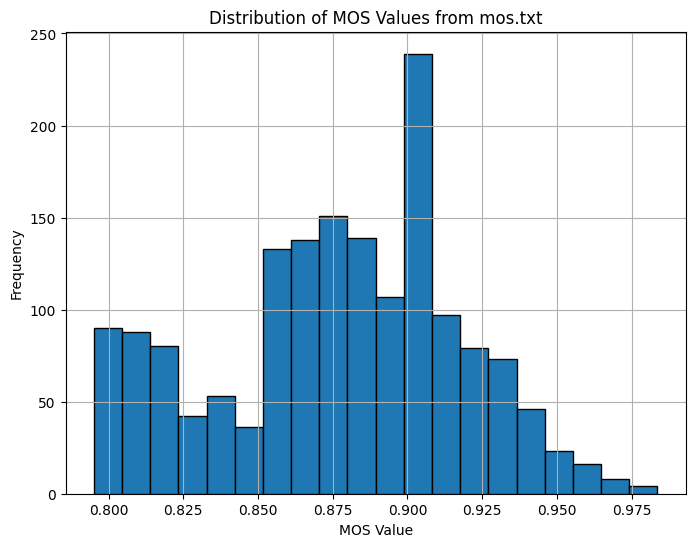


Basic statistics for MOS values:
  Mean: 0.8773
  Median: 0.8825
  Standard Deviation: 0.0412
  Min: 0.7951
  Max: 0.9836


In [31]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the mos.txt file
MOS_FILE = os.path.join(DATASET_PATH, "mos.txt")

mos_values = []

if os.path.exists(MOS_FILE):
    try:
        with open(MOS_FILE, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) > 1:
                    try:
                        # The MOS value is the second part of the line
                        mos = float(parts[1])
                        mos_values.append(mos)
                    except ValueError:
                        print(f"Skipping line due to non-numeric MOS value: {line.strip()}")

        if mos_values:
            print(f"Found {len(mos_values)} MOS values in {MOS_FILE}.")

            # Create a histogram of MOS values
            plt.figure(figsize=(8, 6))
            plt.hist(mos_values, bins=20, edgecolor='black') # Adjust bins as needed
            plt.xlabel("MOS Value")
            plt.ylabel("Frequency")
            plt.title("Distribution of MOS Values from mos.txt")
            plt.grid(True)
            plt.show()

            # Optional: Print basic statistics
            print("\nBasic statistics for MOS values:")
            print(f"  Mean: {np.mean(mos_values):.4f}")
            print(f"  Median: {np.median(mos_values):.4f}")
            print(f"  Standard Deviation: {np.std(mos_values):.4f}")
            print(f"  Min: {np.min(mos_values):.4f}")
            print(f"  Max: {np.max(mos_values):.4f}")


        else:
            print(f"No valid MOS values found in {MOS_FILE}.")

    except Exception as e:
        print(f"An error occurred while reading or plotting MOS values: {e}")

else:
    print(f"File '{MOS_FILE}' not found.")

Extracting MOS scores from 1930 metadata entries...
Found 1930 MOS scores.

Identified 0 outliers (using IQR method).
Lower bound for outliers: -0.01
Upper bound for outliers: 1.05


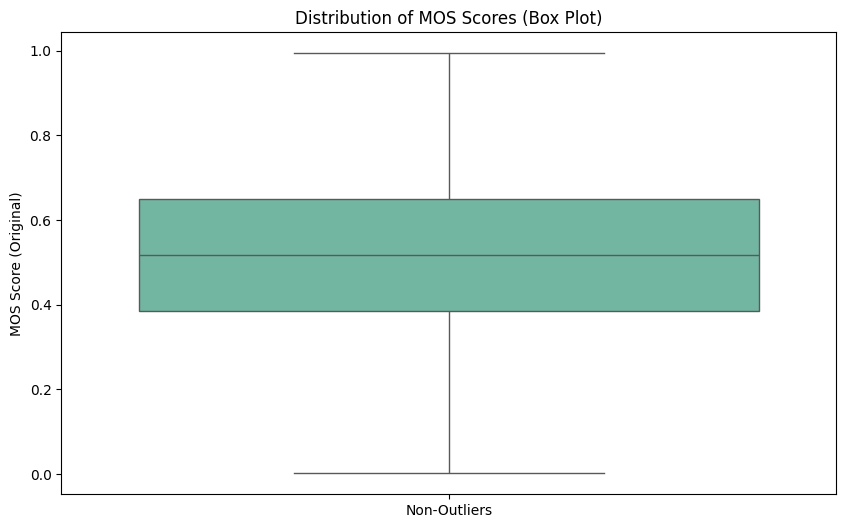

In [32]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the path to the metadata file
metadata_file = os.path.join(PATCHES_PATH, "metadata.json")

mos_scores = []

if os.path.exists(metadata_file):
    try:
        with open(metadata_file, 'r') as f:
            metadata = json.load(f)

        if metadata:
            print(f"Extracting MOS scores from {len(metadata)} metadata entries...")
            for entry in metadata:
                # Assuming original MOS is under 'mos_original' nested in 'metadata'
                if 'metadata' in entry and 'mos_original' in entry['metadata']:
                    mos = entry['metadata']['mos_original']
                    mos_scores.append(mos)
                # Add other potential key locations/names if necessary


            if mos_scores:
                print(f"Found {len(mos_scores)} MOS scores.")

                # Convert to numpy array for easier calculations
                mos_scores_np = np.array(mos_scores)

                # --- Identify Outliers (using IQR method) ---
                Q1 = np.percentile(mos_scores_np, 25)
                Q3 = np.percentile(mos_scores_np, 75)
                IQR = Q3 - Q1

                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                outliers = mos_scores_np[(mos_scores_np < lower_bound) | (mos_scores_np > upper_bound)]
                non_outliers = mos_scores_np[(mos_scores_np >= lower_bound) & (mos_scores_np <= upper_bound)]

                print(f"\nIdentified {len(outliers)} outliers (using IQR method).")
                print(f"Lower bound for outliers: {lower_bound:.2f}")
                print(f"Upper bound for outliers: {upper_bound:.2f}")


                # --- Create Box Plots ---
                plt.figure(figsize=(10, 6))

                # Combine data for plotting
                plot_data = []
                labels = []

                if len(non_outliers) > 0:
                    plot_data.append(non_outliers)
                    labels.append("Non-Outliers")

                if len(outliers) > 0:
                    plot_data.append(outliers)
                    labels.append("Outliers")

                if plot_data:
                    sns.boxplot(data=plot_data, palette="Set2")
                    plt.xticks(ticks=range(len(labels)), labels=labels)
                    plt.ylabel("MOS Score (Original)")
                    plt.title("Distribution of MOS Scores (Box Plot)")

                    plt.show()
                else:
                    print("No data to plot (either no scores found or all scores are outliers/non-outliers).")


            else:
                print("No MOS scores found in the metadata with the assumed key name ('metadata' -> 'mos_original').")

        else:
            print("Metadata file is empty.")

    except json.JSONDecodeError:
        print(f"Error decoding JSON from {metadata_file}. Please check the file for syntax errors.")
    except Exception as e:
        print(f"An error occurred while processing and plotting MOS outliers: {e}")

else:
    print(f"Metadata file '{metadata_file}' not found.")